## XGBoost Model

In [163]:
### modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [164]:
df = pd.read_csv("df_ligand_protein_ml.csv") #("df_for_ml.csv")
df

,ligand_vec0,ligand_vec1,ligand_vec2,ligand_vec3,ligand_vec4,ligand_vec5,ligand_vec6,ligand_vec7,ligand_vec8,ligand_vec9,...,protein_feature_2297,protein_feature_2298,protein_feature_2299,protein_feature_2300,protein_feature_2301,protein_feature_2302,protein_feature_2303,protein_feature_2304,protein_feature_2305,kd
0,1.375364,1157.327848,21.087211,15.869837,15.869837,14.579719,9.275394,9.275394,6.757028,6.757028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.375364,1157.327848,21.087211,15.869837,15.869837,14.579719,9.275394,9.275394,6.757028,6.757028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.375364,1157.327848,21.087211,15.869837,15.869837,14.579719,9.275394,9.275394,6.757028,6.757028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.375364,1157.327848,21.087211,15.869837,15.869837,14.579719,9.275394,9.275394,6.757028,6.757028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.375364,1157.327848,21.087211,15.869837,15.869837,14.579719,9.275394,9.275394,6.757028,6.757028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,2.198041,486.915708,11.380469,9.136640,9.953137,7.775188,4.890440,5.706937,3.209443,4.250120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11446,2.299660,409.141036,11.974691,10.708833,11.525330,7.291224,6.046847,6.455096,6.739774,7.126472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11447,2.045164,660.695584,15.250712,13.141645,14.774638,9.774387,7.482629,8.770530,7.766945,9.101338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11448,2.017823,466.487582,13.062632,10.154371,12.556864,8.580045,6.124441,8.729073,4.952847,7.280534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
df = df.rename(columns={'kd': 'target'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11450 entries, 0 to 11449
Columns: 2506 entries, ligand_vec0 to target
dtypes: float64(2506)
memory usage: 218.9 MB


In [166]:
df.describe()

,ligand_vec0,ligand_vec1,ligand_vec2,ligand_vec3,ligand_vec4,ligand_vec5,ligand_vec6,ligand_vec7,ligand_vec8,ligand_vec9,...,protein_feature_2297,protein_feature_2298,protein_feature_2299,protein_feature_2300,protein_feature_2301,protein_feature_2302,protein_feature_2303,protein_feature_2304,protein_feature_2305,target
count,11450.000000,11450.000000,11450.000000,11450.000000,11450.000000,11450.000000,11450.000000,11450.000000,11450.000000,11450.000000,...,11450.000000,11450.000000,1.145000e+04,1.145000e+04,1.145000e+04,11450.000000,11450.000000,11450.0,11450.000000,11450.000000
mean,0.671833,894.613254,18.245687,14.243400,15.069315,11.767651,7.756567,8.607774,5.542198,6.521029,...,0.000072,0.000001,2.848929e-09,2.298574e-07,6.487368e-08,0.000061,0.000181,0.0,0.000232,0.430131
std,28.584736,1085.965154,32.375393,31.437484,31.562405,30.504798,29.725638,29.841062,29.373956,29.513350,...,0.002574,0.000050,1.015807e-07,8.195740e-06,2.313120e-06,0.002178,0.006447,0.0,0.008277,0.495116
min,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.585244,504.237354,14.328063,11.568872,12.113434,9.308862,6.649799,7.221455,4.946651,5.729420,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.900580,768.870715,17.932511,13.422898,14.215826,12.220347,7.977279,8.675893,5.985483,6.640182,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000
75%,2.093665,1045.874541,20.976481,16.992868,17.703164,14.285731,9.854218,10.657158,7.425175,8.251662,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,1.000000
max,5.277365,32745.396853,284.119723,240.768412,259.401818,210.693232,150.616310,150.616310,127.611923,134.649145,...,0.091828,0.001797,3.624471e-06,2.924297e-04,8.253374e-05,0.077730,0.230017,0.0,0.295312,1.000000


Looking at the mean values of different features shows a huge variation, so feature scaling is going to be important

In [167]:
#Find and print column names with null values 
columns_with_null = df.columns[df.isnull().any()]

print("Columns with null values:", columns_with_null)
# shows that there are not any null values - this is as expected since I had already claened the data

Columns with null values: Index([], dtype='object')


In [168]:
## Now remove columns with constant values
nunique = df.nunique() # gives the number of unique elements in each column
print(nunique)
cols_to_drop = nunique[nunique == 1].index
#print(cols_to_drop)
df = df.drop(cols_to_drop, axis=1)
df.shape

ligand_vec0             2783
ligand_vec1             2779
ligand_vec2             1234
ligand_vec3             2684
ligand_vec4             2742
                        ... 
protein_feature_2302       2
protein_feature_2303       2
protein_feature_2304       1
protein_feature_2305       2
target                     2
Length: 2506, dtype: int64


(11450, 947)

If there were null values we would have to deal with them either by droping the rows (dropna), or filling them (impute) in by other values, eg mean of the column, mode, using k nearest neighbors, etc. Also encoding categorical features if needed.

In [169]:
# Check for maximum and minimum values
#print("Max value in X_train:", np.max(X_train))
#print("Min value in X_train:", np.min(X_train))


In [170]:
X = df.drop('target',axis = 1) #features
y = df['target'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = np.clip(X_train, a_min=-1e10, a_max=1e10)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
X_test = np.clip(X_test, a_min=-1e10, a_max=1e10)

print(y_train.value_counts())


target
0.0    4188
1.0    3140
Name: count, dtype: int64


In [171]:
#X_train.describe()
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(y_train)))

# Check for Inf values
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(y_train)))

False
False
False
False


In [172]:
# Check for maximum and minimum values
print("Max value in X_train:", np.max(X_train))
print("Min value in X_train:", np.min(X_train))

#X_train = np.clip(X_train, a_min=-1e10, a_max=1e10)

Max value in X_train: 10000000000.0
Min value in X_train: -666.0


In [173]:
# As a quick inspection of the feature columns shows that the dataframe is sparse, there might be many noninformative features.
# I ll check that below

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

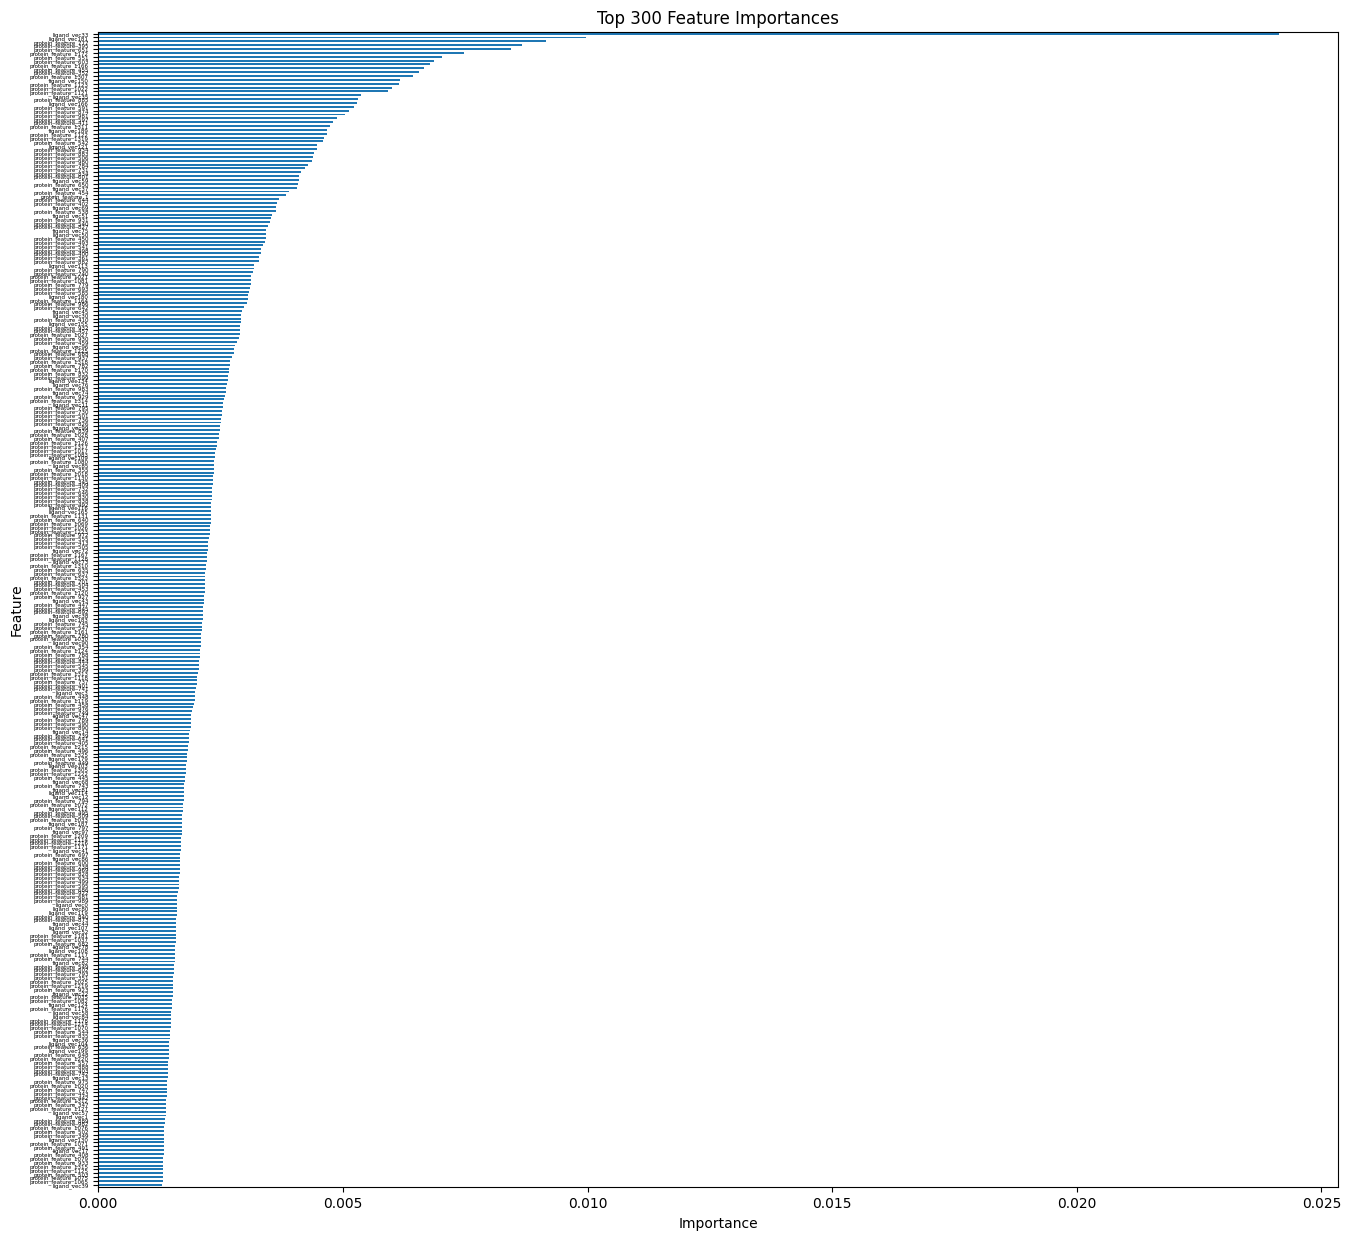

In [174]:
# Fit XGBRegressor
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)

feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)

# top 300 features
feat_importances_top = feat_importances.nlargest(300)

# plot
fig, ax = plt.subplots(figsize=(16, 15))
feat_importances_top.plot(kind='barh', ax=ax)

# x-axis tick label size
ax.tick_params(axis='y', labelsize=4)  # Change the labelsize to your desired size

# invert y-axis to have the most important features at the top
ax.invert_yaxis()

# Add title and labels
ax.set_title('Top 300 Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

plt.show()

In [207]:
# Let's build a pipeline that allows to crossvalidate the data preprocessing parameters with ML parameters
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(mutual_info_classif, k=940)),
    ('classifier', XGBClassifier(n_estimators=200, max_depth = 5, min_child_weight=20, learning_rate=0.05, 
                objective='binary:logistic', eval_metric='logloss', seed=42))
     ])

In [202]:
#X_val.head()

In [208]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=940,
                             score_func=<function mutual_info_classif at 0x0000022AFF3039D0>)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=20, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [209]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test) 

In [210]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Precision:",metrics.precision_score(y_train, y_pred_train))
print("Recall:",metrics.recall_score(y_train, y_pred_train))

Accuracy: 0.8336517467248908
Precision: 0.8684311469121596
Recall: 0.7210191082802547


In [211]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))

Accuracy: 0.7563318777292577
Precision: 0.7879548306148055
Recall: 0.6175024582104228


In [217]:
search_space = [{'selector__k': [500, 946],
                 'classifier__max_depth': [4, 5, 6, 7],
                 'classifier__learning_rate': [0.01, 0.05, 0.10, 0.15, 0.20],
                 'classifier__n_estimators': [100, 200],
                 'classifier__min_child_weight': [15, 20, 25]
                }]

In [218]:
clf = GridSearchCV(pipe, search_space, cv=4, verbose=1)
clf = clf.fit(X_train, y_train)

Fitting 4 folds for each of 240 candidates, totalling 960 fits


In [219]:
clf.best_params_

{'classifier__learning_rate': 0.05,
 'classifier__max_depth': 7,
 'classifier__min_child_weight': 20,
 'classifier__n_estimators': 200,
 'selector__k': 500}

In [220]:
results = pd.DataFrame(clf.cv_results_)
#print(results)

In [221]:
# Sort the DataFrame by mean_test_score in descending order
df_results_sorted = results.sort_values(by='mean_test_score', ascending=False)
print(df_results_sorted)

     mean_fit_time  std_fit_time  mean_score_time  std_score_time   
90       37.690880      0.536198         0.045577        0.015262  \
87       42.133838      0.987675         0.042984        0.004352   
147      36.168290      0.591743         0.040923        0.006352   
91       42.243699      0.632364         0.040472        0.000102   
132      32.971473      0.311386         0.030424        0.000236   
..             ...           ...              ...             ...   
0        31.769159      0.527867         0.032781        0.002386   
5        33.276217      0.604576         0.041588        0.001030   
1        32.650115      0.876358         0.041159        0.004346   
9        32.479715      0.531614         0.042016        0.004197   
8        31.069222      0.363791         0.034217        0.004110   

    param_classifier__learning_rate param_classifier__max_depth   
90                             0.05                           7  \
87                             0.05  

In [222]:
print(df_results_sorted[['param_classifier__learning_rate', 'param_classifier__max_depth',
                        'param_classifier__n_estimators', 'mean_test_score']])

    param_classifier__learning_rate param_classifier__max_depth   
90                             0.05                           7  \
87                             0.05                           7   
147                            0.15                           4   
91                             0.05                           7   
132                             0.1                           7   
..                              ...                         ...   
0                              0.01                           4   
5                              0.01                           4   
1                              0.01                           4   
9                              0.01                           4   
8                              0.01                           4   

    param_classifier__n_estimators  mean_test_score  
90                             200         0.748499  
87                             200         0.748362  
147                            20

In [223]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=500,
                             score_func=<function mutual_info_classif at 0x0000022AFF3039D0>)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=20, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [224]:
clf.best_score_

0.7484989082969432

In [225]:
best_params = clf.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__learning_rate': 0.05, 'classifier__max_depth': 7, 'classifier__min_child_weight': 20, 'classifier__n_estimators': 200, 'selector__k': 500}


In [ ]:
## From above, It seems, use of early stopage with XGB can help significantly to avoid overfitting, but it seems to be tricky to implement
# with the pipeline. One potential solution is doing crossvalidation without using the pipeline.

## Model Evaluation

In [226]:
pred_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('selector', SelectKBest(mutual_info_classif, k=500)),  # Feature selection
    ('classifier', XGBClassifier(learning_rate=0.05, max_depth=7, n_estimators=200, min_child_weight=20))  # XGBoost Classifier
])

# Fit the pipeline on the training data
pred_pipe.fit(X_train, y_train)

# Predict target values for the test set
y_pred_test = pred_pipe.predict(X_test)

In [227]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))

Accuracy: 0.7602620087336245
Precision: 0.7888888888888889
Recall: 0.6283185840707964


Accuracy: 0.7602620087336245
Precision: 0.7888888888888889
Recall: 0.6283185840707964


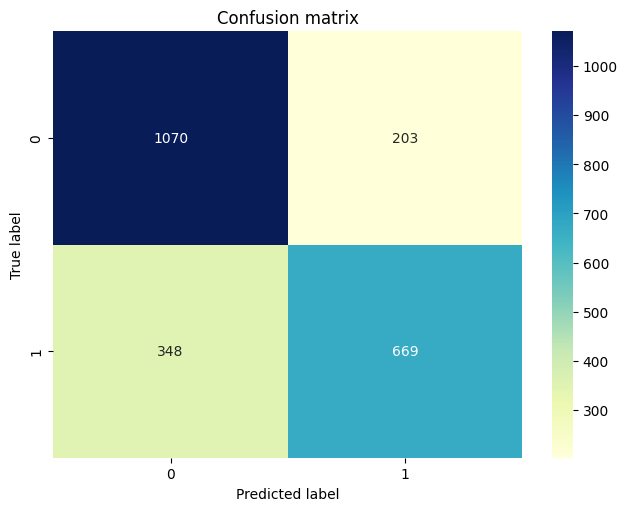

In [228]:
sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))

The model performance is okay. The hyperparameter space can be further tuned, particularly by using the 'early stoppage' to get a better model. 

In [ ]:
### It seems, use of early stopage with XGB can help significantly to avoid overfitting, but it seems to be tricky to implement
# with the pipeline. One potential solution is doing crossvalidation without using the pipeline.